[ 1.00000000e+00  1.50000000e+00  3.25000000e+00  4.37500000e+00
  2.81250000e+00  3.59375000e+00  2.03125000e-01  8.98437500e-01
 -4.49218750e-01  2.24609375e-01 -1.12304688e-01  5.61523438e-02
 -2.80761719e-02  1.40380859e-02 -7.08007812e-03  3.41796875e-03
 -1.95312500e-03  6.10351562e-04 -6.10351562e-04  0.00000000e+00
 -1.22070312e-04]


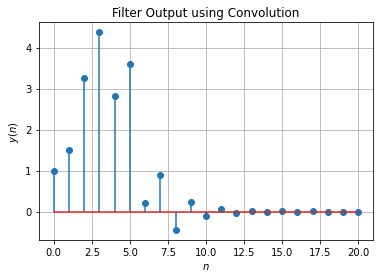

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#If using termux
import subprocess
import shlex
#end if



n = np.arange(14)
fn=(-1/2)**n
hn1=np.pad(fn, (0,2), 'constant', constant_values=(0))
hn2=np.pad(fn, (2,0), 'constant', constant_values=(0))
h = hn1+hn2

nh=len(h)
x=np.array([1.0,2.0,3.0,4.0,2.0,1.0])
nx = len(x)

y = np.zeros(nx+nh-1)

for k in range(0,nx+nh-1):
	for n in range(0,nx):
		if k-n >= 0 and k-n < nh:
			y[k]+=x[n]*h[k-n]

print(y)
#plots
plt.stem(range(0,nx+nh-1),y)
plt.title('Filter Output using Convolution')
plt.xlabel('$n$')
plt.ylabel('$y(n)$')
plt.grid()# minor

In [2]:
from scipy.linalg import toeplitz

In [3]:
column = []
for i in h:
    column.append(i)
for j in range(0, 5):
    column.append(0)
row = []
row.append(h[0])
for k in range(0, 5):
    row.append(0)
print(column)

[1.0, -0.5, 1.25, -0.625, 0.3125, -0.15625, 0.078125, -0.0390625, 0.01953125, -0.009765625, 0.0048828125, -0.00244140625, 0.001220703125, -0.0006103515625, 0.000244140625, -0.0001220703125, 0, 0, 0, 0, 0]


# Insert toeplitz matrix

In [4]:
matrix = toeplitz(row, column)
x

array([1., 2., 3., 4., 2., 1.])

In [5]:
x_t = np.transpose(x)
x_t

array([1., 2., 3., 4., 2., 1.])

In [6]:
x

array([1., 2., 3., 4., 2., 1.])

In [7]:
matrix_t = np.transpose(matrix)

In [8]:
np.dot(matrix_t, x)

array([ 1.00000000e+00,  1.50000000e+00,  3.25000000e+00,  4.37500000e+00,
        2.81250000e+00,  3.59375000e+00,  2.03125000e-01,  8.98437500e-01,
       -4.49218750e-01,  2.24609375e-01, -1.12304688e-01,  5.61523438e-02,
       -2.80761719e-02,  1.40380859e-02, -7.08007812e-03,  3.41796875e-03,
       -1.95312500e-03,  6.10351562e-04, -6.10351562e-04,  0.00000000e+00,
       -1.22070312e-04])

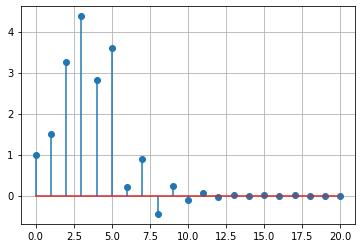

In [11]:
plt.stem(range(0,nx+nh-1),y)
plt.grid()

# Convolving with x

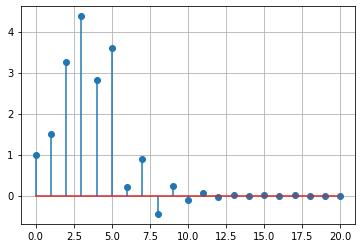

In [10]:
y_2 = np.zeros(nx+nh-1)

for k in range(0,nx+nh-1):
	for n in range(0,nh):
		if k-n >= 0 and k-n < nx:
			y_2[k]+=x[k-n]*h[n]

plt.stem(range(0,nx+nh-1),y_2)
plt.grid()